K NEAREST NEIGHBOR SOLUTION

In [71]:
# IMPORT
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from src.classifiers import knn

#PLOT SETTINGS
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#AUTO RELOAD MODULES
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
# LOAD RAW CIFAR-10 DATA
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
x_train, y_train, x_test, y_test = load_CIFAR10(cifar10_dir)# Load the raw CIFAR-10 data.

#GRAB BATCH OF TRAINING/TEST DATA
X_train = x_train[:5000]
Y_train = y_train[:5000]
X_test = x_test[:500]
Y_test = y_test[:500]

#RESHAPE DATA TO 2D
X_train = np.reshape(X_train,(X_train.shape[0],-1))
X_test = np.reshape(X_test,(X_test.shape[0],-1))
print x_train.shape,y_train.shape,x_test.shape,y_test.shape

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


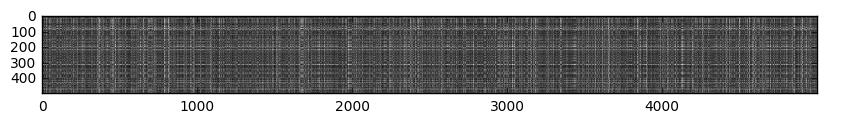

Accuracy: 30.2 percent


In [66]:
#TEST KNN CLASS - VARY K
classifier = knn()
classifier.train(X_train,Y_train)
dist = classifier.distance(X_test)
predict = classifier.predict(dist,k=5)
acc = classifier.accuracy(predict,Y_test)

#PLOT TO LOOK AT DATA
plt.imshow(dist, interpolation='none')
plt.show()

#PRINT ACCURACY
print("Accuracy: "+str(acc*100)+" percent")

Note - the columns of white/black occur because training matrix is repeated along that axis 500 times. The solution is ultimately summed along the 3072 axis. 

In [67]:
#CHECK - NOTE: SKIPPED TIMING EXERCISE
dist1 = classifier.distance(X_test)
dist2 = classifier.test(X_test)
if dist1.all()==dist2.all():
    print "Check Passed"
else:
     print "Check Failed" 

(500, 5000) (500, 5000)


In [82]:
#CROSS VALIDATION
folds = 5
interval = int(X_train.shape[0]/float(folds))
ks = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
cross_dict = dict()

#ITERATE THROUGH Ks
for k in ks:
    accuracy = []
    print("--- K: "+str(k))
    for fold in range(folds):
        classifier = knn()
        batch_x = X_train[interval*fold:interval*fold+interval]
        batch_y = Y_train[interval*fold:interval*fold+interval]
        batch_x = np.reshape(batch_x,(batch_x.shape[0],-1))
        classifier.train(batch_x,batch_y)
        distance = classifier.distance(X_test)
        curr_predict = classifier.predict(distance,k=k)
        curr_accuracy = classifier.accuracy(curr_predict,Y_test)
        print("Fold: "+str(fold)+", Accuracy: "+str(curr_accuracy))
        np.append(accuracy,curr_accuracy)
        cross_dict[k] = accuracy    

--- K: 1
Fold: 0, Accuracy: 0.258
Fold: 1, Accuracy: 0.228
Fold: 2, Accuracy: 0.244
Fold: 3, Accuracy: 0.244
Fold: 4, Accuracy: 0.268
--- K: 3
Fold: 0, Accuracy: 0.262
Fold: 1, Accuracy: 0.232
Fold: 2, Accuracy: 0.244
Fold: 3, Accuracy: 0.23
Fold: 4, Accuracy: 0.234
--- K: 5
Fold: 0, Accuracy: 0.252
Fold: 1, Accuracy: 0.23
Fold: 2, Accuracy: 0.266
Fold: 3, Accuracy: 0.22
Fold: 4, Accuracy: 0.238
--- K: 8
Fold: 0, Accuracy: 0.252
Fold: 1, Accuracy: 0.236
Fold: 2, Accuracy: 0.258
Fold: 3, Accuracy: 0.246
Fold: 4, Accuracy: 0.238
--- K: 10
Fold: 0, Accuracy: 0.23
Fold: 1, Accuracy: 0.238
Fold: 2, Accuracy: 0.246
Fold: 3, Accuracy: 0.242
Fold: 4, Accuracy: 0.248
--- K: 12
Fold: 0, Accuracy: 0.234
Fold: 1, Accuracy: 0.238
Fold: 2, Accuracy: 0.238
Fold: 3, Accuracy: 0.224
Fold: 4, Accuracy: 0.248
--- K: 15
Fold: 0, Accuracy: 0.218
Fold: 1, Accuracy: 0.244
Fold: 2, Accuracy: 0.232
Fold: 3, Accuracy: 0.222
Fold: 4, Accuracy: 0.244
--- K: 20
Fold: 0, Accuracy: 0.224
Fold: 1, Accuracy: 0.244
Fol

SVM SOLUTION

In [1]:
%reset
# IMPORT
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

#PLOT SETTINGS
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#AUTO RELOAD MODULES
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [3]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# Renormalize
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

In [9]:
from src.classifiers import *

# Set SVM classifier
classifier = svm()
W = np.random.randn(3073, 10) * 0.0001

# Compute loss and gradient
loss,grad = classifier.loss(W,X_dev,y_dev,0.00001)
print 'loss: %f, grad total: %f' % (loss,np.min(grad))

loss: 8.969319, grad total: -75.434654


In [10]:
# Check
from cs231n.gradient_check import grad_check_sparse

# Compute the loss and its gradient at W.
loss, grad = classifier.loss(W, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
f = lambda w: classifier.loss(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = classifier.loss(W, X_dev, y_dev, 1e2)
f = lambda w: classifier.loss(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 4.192770 analytic: 4.192770, relative error: 5.472013e-11
numerical: 4.032381 analytic: 4.032381, relative error: 1.403165e-11
numerical: 7.716839 analytic: 7.716839, relative error: 7.678812e-12
numerical: 36.749901 analytic: 36.749901, relative error: 4.906142e-13
numerical: -32.326258 analytic: -32.326258, relative error: 7.892817e-12
numerical: 2.768584 analytic: 2.768584, relative error: 5.568518e-11
numerical: -4.419164 analytic: -4.419164, relative error: 3.406698e-11
numerical: 5.453170 analytic: 5.453170, relative error: 4.396860e-12
numerical: -6.722223 analytic: -6.722223, relative error: 3.511175e-12
numerical: -25.613300 analytic: -25.613300, relative error: 6.200427e-12
numerical: 11.434478 analytic: 11.434478, relative error: 2.410635e-11
numerical: -30.639355 analytic: -30.576046, relative error: 1.034197e-03
numerical: 13.958031 analytic: 13.958031, relative error: 7.969408e-12
numerical: 15.890776 analytic: 15.890776, relative error: 1.259570e-11
numerical:

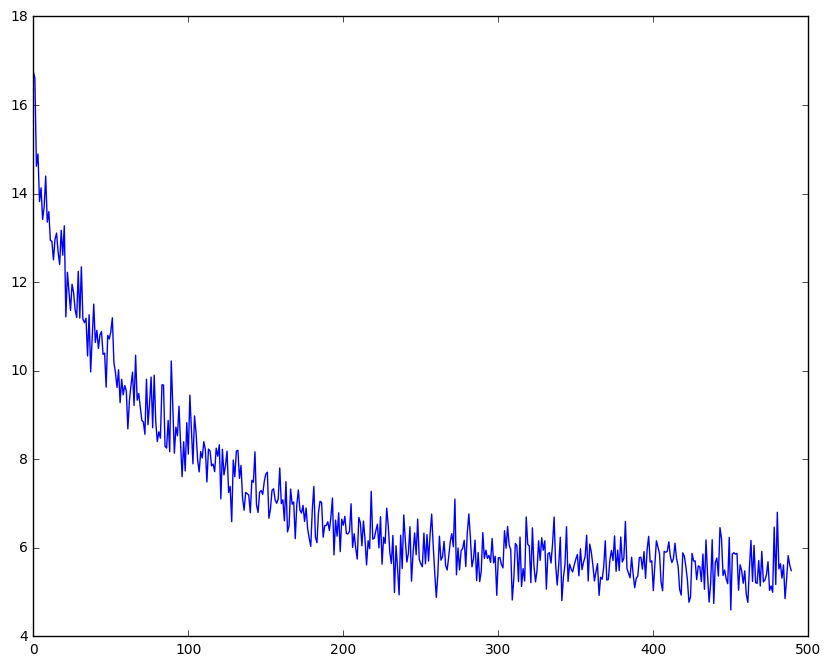

In [11]:
loss_hist = classifier.train(X_train,y_train,batch_size=100)
plt.plot(loss_hist)

In [12]:
y_pred = classifier.predict(X_test)
acc = classifier.accuracy(y_pred,y_test)
print("Current Accuracy: "+str(acc*100))

Current Accuracy: 36.3
